In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
path = r'C:\Users\Ben\Desktop\Career Foundry Tasks\Board Game Analysis'

In [3]:
df = pd.read_csv(os.path.join(path, 'items_wrangled.csv'), index_col = False)

In [4]:
df.head()

,name,game_id,rating,complexity_rating,year_published,min_players,max_players,min_play_time,max_play_time,min_age,owned_by,top_2000
0,Die Macher,1,7.59717,4.3153,1986.0,3,5,240,240,14,8015,1
1,Dragonmaster,2,6.65060,1.9636,1981.0,3,4,30,30,12,1372,0
2,Samurai,3,7.46109,2.4768,1998.0,2,4,30,60,10,16459,1
3,Tal der Könige,4,6.61910,2.6667,1992.0,2,4,60,60,12,674,0
4,Acquire,5,7.33449,2.5000,1964.0,2,6,90,90,12,25476,1


In [5]:
df = df.drop(columns = ['name', 'game_id', 'top_2000'])

In [6]:
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [7]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [8]:
df.isnull().sum()

rating               0
complexity_rating    0
year_published       3
min_players          0
max_players          0
min_play_time        0
max_play_time        0
min_age              0
owned_by             0
dtype: int64

In [9]:
df=df.fillna(df.mean())

In [10]:
df.isnull().sum()

rating               0
complexity_rating    0
year_published       0
min_players          0
max_players          0
min_play_time        0
max_play_time        0
min_age              0
owned_by             0
dtype: int64

In [11]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]

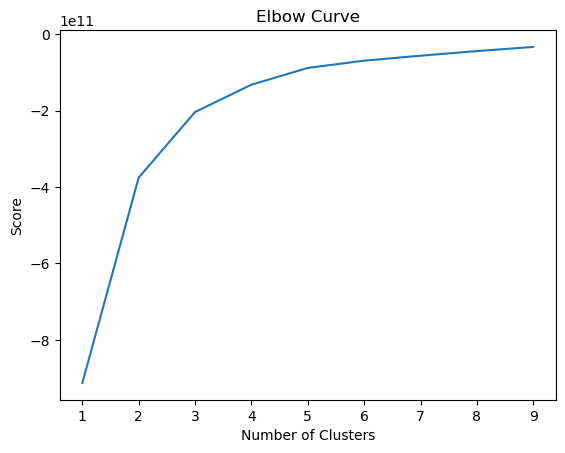

In [12]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [14]:
kmeans = KMeans(n_clusters = 3)

In [15]:
kmeans.fit(df)

KMeans(n_clusters=3)

In [16]:
df['clusters'] = kmeans.fit_predict(df)

In [17]:
df.head()

,rating,complexity_rating,year_published,min_players,max_players,min_play_time,max_play_time,min_age,owned_by,clusters
0,7.59717,4.3153,1986.0,3,5,240,240,14,8015,0
1,6.65060,1.9636,1981.0,3,4,30,30,12,1372,0
2,7.46109,2.4768,1998.0,2,4,30,60,10,16459,1
3,6.61910,2.6667,1992.0,2,4,60,60,12,674,0
4,7.33449,2.5000,1964.0,2,6,90,90,12,25476,1


In [18]:
df['clusters'].value_counts()

0    21067
1      484
2       58
Name: clusters, dtype: int64

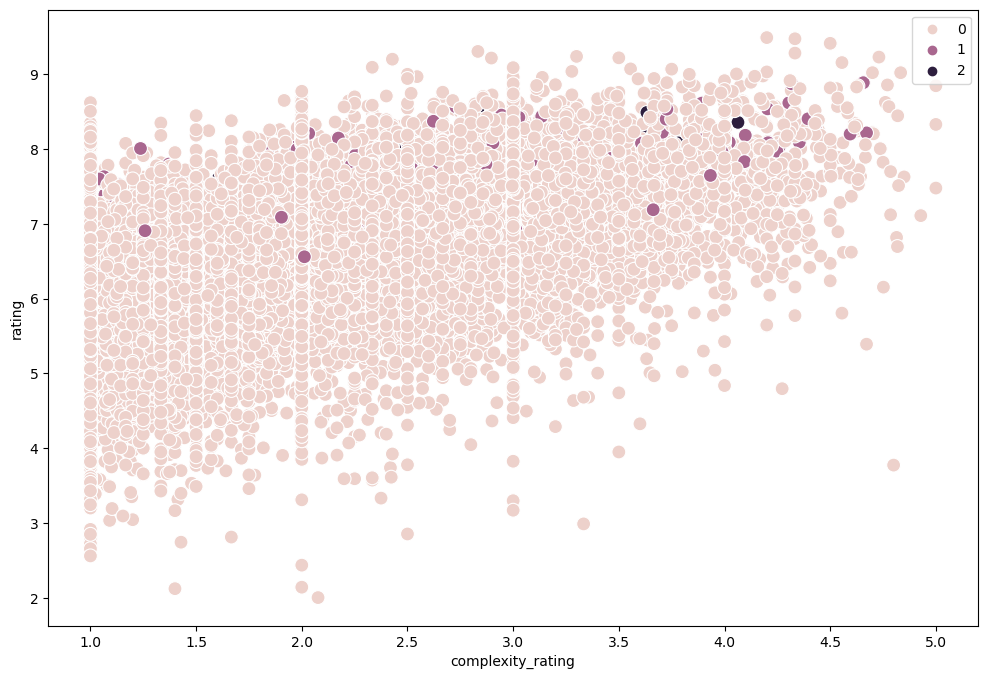

In [19]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['complexity_rating'], y=df['rating'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('complexity_rating')
plt.ylabel('rating')
plt.show()

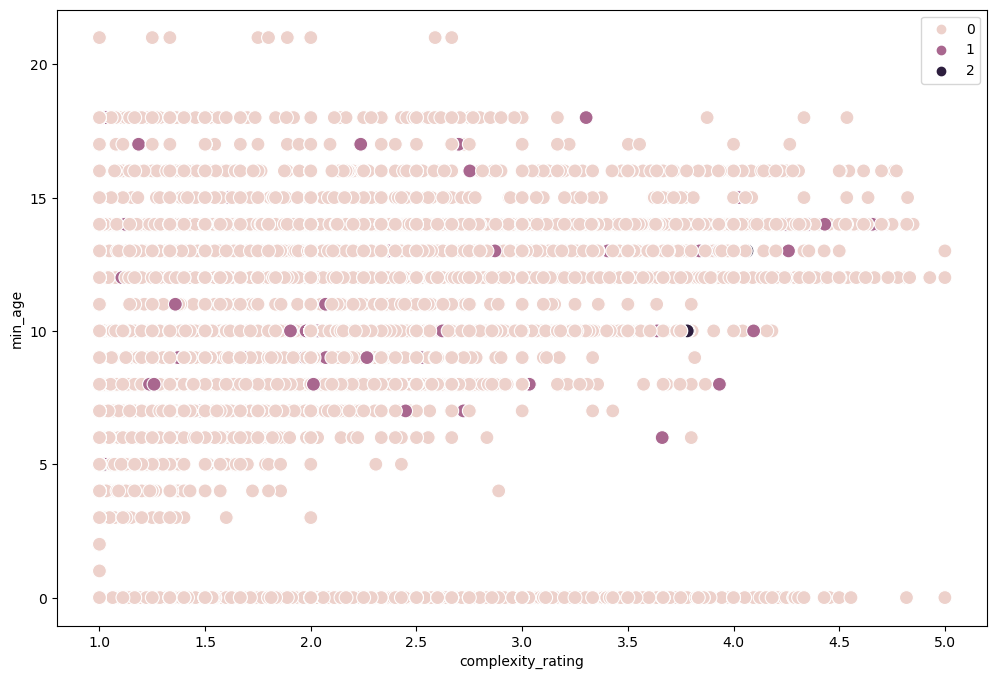

In [20]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['complexity_rating'], y=df['min_age'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('complexity_rating')
plt.ylabel('min_age')
plt.show()

In [21]:
df_2 = pd.read_csv(os.path.join(path, 'board_game_wrangled.csv'), index_col = False)

In [23]:
df_2.head()

,rank,bgg_url,game_id,name,min_players,max_players,min_time,max_time,complexity_rating,year,...,top_10_themes,total_themes,abstract_games,childrens_games,customizable_games,family_games,party_games,strategy_games,thematic_games,war_games
0,1,https://boardgamegeek.com/boardgame/224517,224517,Brass: Birmingham,2,4.0,60.0,120.0,3.8951,2018.0,...,1,6,0,0,0,0,0,1,0,0
1,2,https://boardgamegeek.com/boardgame/161936,161936,Pandemic Legacy: Season 1,2,4.0,60.0,60.0,2.8319,2015.0,...,0,2,0,0,0,0,0,1,1,0
2,3,https://boardgamegeek.com/boardgame/174430,174430,Gloomhaven,1,4.0,60.0,120.0,3.8964,2017.0,...,4,5,0,0,0,0,0,1,1,0
3,4,https://boardgamegeek.com/boardgame/342942,342942,Ark Nova,1,4.0,90.0,150.0,3.7253,2021.0,...,1,3,0,0,0,0,0,1,0,0
4,5,https://boardgamegeek.com/boardgame/233078,233078,Twilight Imperium: Fourth Edition,3,6.0,240.0,480.0,4.3077,2017.0,...,4,8,0,0,0,0,0,1,1,0


In [26]:
df_2.columns

Index(['rank', 'bgg_url', 'game_id', 'name', 'min_players', 'max_players',
       'min_time', 'max_time', 'complexity_rating', 'year', 'age',
       'avg_rating', 'geek_rating', 'num_votes', 'owned', 'designer',
       'top_10_themes', 'total_themes', 'abstract_games', 'childrens_games',
       'customizable_games', 'family_games', 'party_games', 'strategy_games',
       'thematic_games', 'war_games'],
      dtype='object')

In [27]:
df_2 = df_2.drop(columns = ['bgg_url', 'game_id', 'name', 'designer', 'abstract_games', 'childrens_games',
       'customizable_games', 'family_games', 'party_games', 'strategy_games',
       'thematic_games', 'war_games'])

In [28]:
df_2.isnull().sum()

rank                 0
min_players          0
max_players          1
min_time             3
max_time             3
complexity_rating    0
year                 3
age                  0
avg_rating           0
geek_rating          0
num_votes            0
owned                0
top_10_themes        0
total_themes         0
dtype: int64

In [30]:
df_2=df_2.fillna(df_2.mean())

In [41]:
score = [kmeans[i].fit(df_2).score(df_2) for i in range(len(kmeans))]

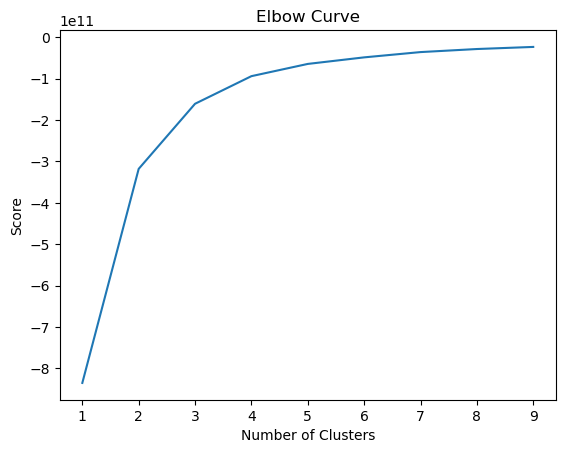

In [42]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [43]:
kmeans = KMeans(n_clusters = 3)

In [44]:
kmeans.fit(df_2)

KMeans(n_clusters=3)

In [45]:
df_2['clusters'] = kmeans.fit_predict(df_2)

In [46]:
df_2['clusters'].value_counts()

0    1737
1     237
2      26
Name: clusters, dtype: int64

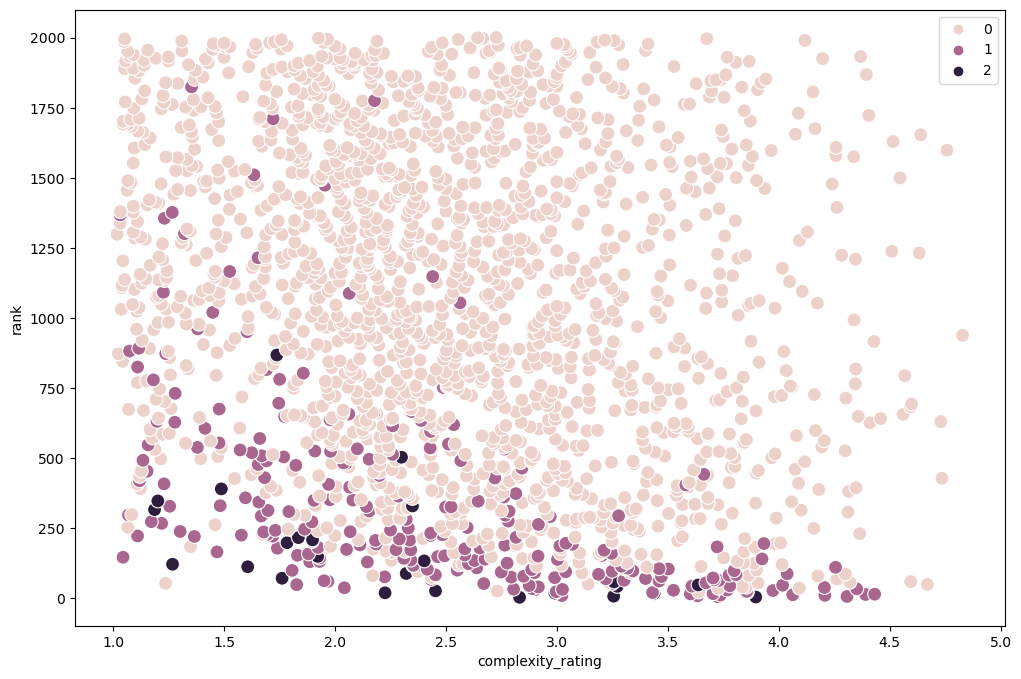

In [48]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['complexity_rating'], y=df_2['rank'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('complexity_rating')
plt.ylabel('rank')
plt.show()

In [50]:
df_2.columns

Index(['rank', 'min_players', 'max_players', 'min_time', 'max_time',
       'complexity_rating', 'year', 'age', 'avg_rating', 'geek_rating',
       'num_votes', 'owned', 'top_10_themes', 'total_themes', 'clusters'],
      dtype='object')

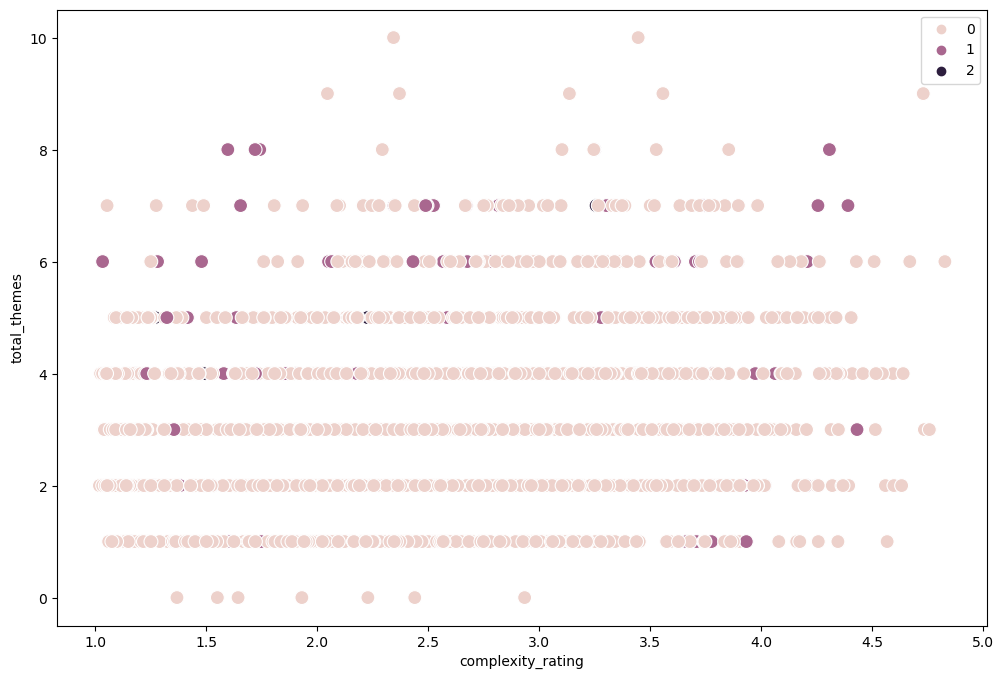

In [51]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['complexity_rating'], y=df_2['total_themes'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('complexity_rating')
plt.ylabel('total_themes')
plt.show()

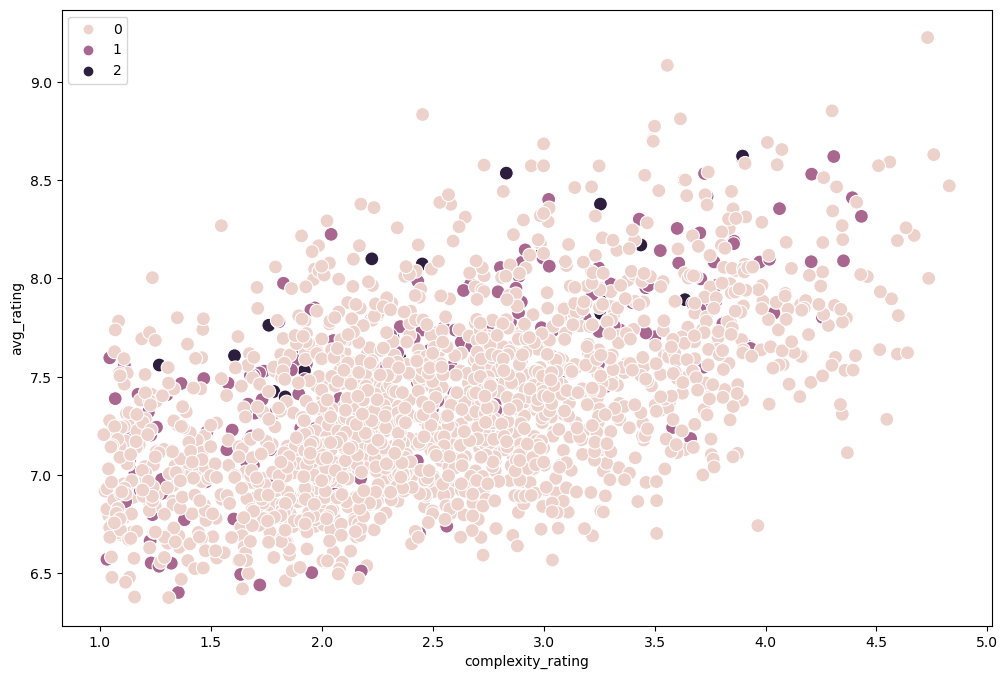

In [52]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['complexity_rating'], y=df_2['avg_rating'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('complexity_rating')
plt.ylabel('avg_rating')
plt.show()

None of the clusters make much sense. I checked the larger data set with all games first and then checked the other data set with the top 2000 games. In both cases, the vast majority was grouped into one cluster which made it difficult to see any trends with the clusters. The smaller clusters had data points scattered everywhere that doesn't make it clear why they were clustered together.

In [53]:
df_2.loc[df_2['clusters'] == 2, 'cluster'] = 'dark purple'
df_2.loc[df_2['clusters'] == 1, 'cluster'] = 'purple'
df_2.loc[df_2['clusters'] == 0, 'cluster'] = 'pink'

In [54]:
df_2.groupby('cluster').agg({'complexity_rating':['mean', 'median'], 
                         'rank':['mean', 'median'], 
                         'avg_rating':['mean', 'median'],
                          'min_time':['mean', 'median']})

complexity_rating                 rank         avg_rating  \
                         mean  median         mean  median       mean   
cluster                                                                 
dark purple          2.333623  2.3105   168.461538   113.0   7.687160   
pink                 2.534808  2.4737  1102.650547  1120.0   7.348362   
purple               2.444388  2.3457   343.105485   223.0   7.469694   

                       min_time         
              median       mean median  
cluster                                 
dark purple  7.60304  44.807692   30.0  
pink         7.29852  60.955139   45.0  
purple       7.49063  50.765982   45.0

It looks like the dark purple cluster included most of the higher ranked games. The minimum play time for this cluster is significantly less than the other two clusters which will be something to look more into if play time has an impact on complexity rating or overall rank. I would have expected that more complex games would take longer to play so the minimum play time would have been higher.